<font size=6><center>**Data Processing for the Boston Airbnb Dataset**</center></font>

In [60]:
# Imports
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ast import literal_eval

# Magic Functions
%matplotlib inline


# Functions

In [61]:
def make_ax(w, h):
    """
    INPUT:
    w - Width of a figure desired
    h - Height of the figure desired
    
    OUTPUT:
    fig - Figure with the desired dimensions
    ax - axis for the figure desired
    """
    
    fig = plt.figure(figsize = (w,h))
    ax = fig.gca()
    return fig, ax

def parse_amenities(amenities_col):
    """
    INPUT:
    amenities_col - the pandas series containing the amenities
    
    OUTPUT:
    df - returns back the original series parsed into a list so it can be ised by the list2dummies function
    """
    
    amenities_col = amenities_col.str.replace("{", "[")
    amenities_col = amenities_col.str.replace("\"", "")
    amenities_col = amenities_col.str.replace("}", "]")
    amenities_col = amenities_col.str.replace("[", "[\"")
    amenities_col = amenities_col.str.replace("]", "\"]")
    amenities_col = amenities_col.str.replace(",", "\",\"")
    return amenities_col

def parse_prices(df, cols):
    """
    INPUT:
    df - the pandas dataframe containing bad price values
    cols - the columns which have price tags
    
    OUTPUT:
    df - returns back the original dataframe with parsed prices as floats
    """
    for col in cols:
        df[col] = df[col].str.replace('$', '')
        df[col] = df[col].str.replace(',', '')
        df[col] = df[col].astype(float)
    return df

def list2dummies(df_col, prefix):
    """
    INPUT:
    df_col - Pandas series containing a stringed list
    prefix - The prefix desired for the dummies
    
    OUTPUT:
    dummies - returns back dummy columns for the df_col stringed list
    """
    
    df_col = df_col.apply(literal_eval) # literal eval transforms string into list
    
    # stack values in list and create pandas dummy variables for each
    dummies = pd.get_dummies(df_col.apply(pd.Series).stack(), prefix = prefix).sum(level=0).astype(int)
    return dummies

def round_half(number):
    """
    INPUT:
    number - number to be rounded
    
    OUTPUT:
    rounded - rounds number to closest 0.5
    """
    rounded = round(number*2)/2
    
    return rounded

# Listings Data

In this section, the data regarding each listing of Airbnb will be ingested and processed for future analysis.

The listing data holds information about each listing, such has review scores, verifications, requirements, amenities, type of property, bed, room, and much more.

## Read and Drop text /URL columns

In [62]:
## Droping some columns that after a careful view will not be necessary for my purposes, such as URLs, some IDs, text columns, some ambiguous locations and some others.

data = pd.read_csv('listings.csv', parse_dates=[
    "host_since", 
    "first_review", 
    "last_review", 
    "last_scraped"]).drop([
    "listing_url", 
    "scrape_id", 
    "experiences_offered", 
    "thumbnail_url", 
    "medium_url", 
    "picture_url", 
    "xl_picture_url", 
    "host_url", 
    "host_thumbnail_url",
    "host_picture_url", 
    "name", 
    "summary", 
    "space", 
    "description", 
    "neighborhood_overview", 
    "notes", 
    "transit",
    "access", 
    "interaction", 
    "house_rules", 
    "host_location",
    "host_about", 
    "state", 
    "city", 
    "market", 
    "smart_location", 
    "country_code", 
    "is_location_exact", 
    "country", 
    "license", 
    "jurisdiction_names", 
    "requires_license", 
    "calendar_last_scraped", 
    "calendar_updated",
    "host_total_listings_count", 
    "has_availability",
    "calculated_host_listings_count",
    "host_neighbourhood", 
    "neighbourhood", 
    "neighbourhood_group_cleansed",
    "weekly_price", 
    "monthly_price",
    "security_deposit"
], axis=1)

data.sample(2)

,id,last_scraped,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
259,4105704,2016-09-07,21299112,Helen,2014-09-13,within a day,100%,100%,t,2,"['email', 'phone', 'reviews', 'kba']",t,t,"Hampstead Road, Boston, MA 02130, United States",Jamaica Plain,02130,42.302364,-71.114910,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$135.00,$30.00,1,$0.00,2,1125,4,16,36,284,104,2014-10-10,2016-08-25,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate,f,f,4.46
139,7845607,2016-09-07,38120441,Jacob,2015-07-10,within a day,90%,88%,f,1,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Goodrich Road, Boston, MA 02130, United States",Jamaica Plain,02130,42.315798,-71.116963,House,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Pets Al...",NaN,$55.00,$20.00,1,$25.00,1,1125,0,0,0,0,9,2015-09-08,2016-08-03,78.0,9.0,6.0,9.0,9.0,9.0,8.0,f,flexible,f,f,0.74


## Data Processing

In this Section will be performed some data processing of the data in question. Some of the columns come in a non-adequate format and have to be dealt with.

### Percentages

The Percentage data in this dataset has the percentage symbol and which makes it a string. In order to better use this variable I passed it from Categorical to Numeric, making it a ratio instead

In [63]:
data[["host_response_rate", "host_acceptance_rate"]].head(3)

,host_response_rate,host_acceptance_rate
0,NaN,NaN
1,100%,100%
2,100%,88%


In [64]:
data["host_response_rate"] = data["host_response_rate"].str.replace('%', '').astype(float)/100
data["host_acceptance_rate"] = data["host_acceptance_rate"].str.replace('%', '').astype(float)/100
data[["host_response_rate", "host_acceptance_rate"]].head(3)

,host_response_rate,host_acceptance_rate
0,NaN,NaN
1,1.0,1.00
2,1.0,0.88


### Booleans

The Booleans in this dataset are represented as strings of either **'t'** for **true** or **'f'** for **false**.

Having this, it is possible to turn it around and make it a real Boolean value, but for the sake of out later analysis we make it a numeric binary instead. 
That way it becomes easier to perform statistics such has "How many of the listings have **instant bookable** turned on?"

In [65]:
# Change f and t to binary
bool_cols = ["host_is_superhost", 
             "host_has_profile_pic", 
             "host_identity_verified",
             "instant_bookable", 
             "require_guest_profile_picture", 
             "require_guest_phone_verification"]

data[bool_cols].head(2)

,host_is_superhost,host_has_profile_pic,host_identity_verified,instant_bookable,require_guest_profile_picture,require_guest_phone_verification
0,f,t,f,f,f,f
1,f,t,t,t,f,f


In [66]:
data[bool_cols] = data[bool_cols].replace({'f':0, 't':1}).astype(int)
data[bool_cols].head(2)

,host_is_superhost,host_has_profile_pic,host_identity_verified,instant_bookable,require_guest_profile_picture,require_guest_phone_verification
0,0,1,0,0,0,0
1,0,1,1,1,0,0


### Lists

This Dataset has two fields that are populated with lists.

- **HOST VERIFICATIONS** - Comes up nicely in a stringed list and it is straightforward to transform it into dummy columns using the list2dummies function.
- **AMENITIES** - This is comes a bit unformatted. instead of square brackets, it comes with curly. Plus, some amenities do not even have double quotes. So some more processing is needed before using the list2dummies function

In [67]:
data["host_verifications"].head(2)

0            ['email', 'phone', 'facebook', 'reviews']
1    ['email', 'phone', 'facebook', 'linkedin', 'am...
Name: host_verifications, dtype: object

In [68]:
# Here we are parsing the list of host verifications from a list cast as a string to dummy variables using 
# the list2dummies function

data = pd.concat([data, list2dummies(data.host_verifications, 'host_verifications')], axis=1)\
    .drop('host_verifications', axis=1)
data.filter(like='host_verifications').head(2)

,host_verifications_amex,host_verifications_email,host_verifications_facebook,host_verifications_google,host_verifications_jumio,host_verifications_kba,host_verifications_linkedin,host_verifications_manual_offline,host_verifications_manual_online,host_verifications_phone,host_verifications_reviews,host_verifications_sent_id,host_verifications_weibo
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [69]:
# As we can see, the amenities feature has t be parsed first into a list before using the list2dummies()

data["amenities"].iloc[0]

'{TV,"Wireless Internet",Kitchen,"Free Parking on Premises","Pets live on this property",Dog(s),Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Fire Extinguisher",Essentials,Shampoo,"Laptop Friendly Workspace"}'

In [70]:
data["amenities"] = parse_amenities(data["amenities"])
data = pd.concat([data, list2dummies(data.amenities, 'amenities')], axis=1).drop('amenities', axis=1)
data.filter(like='amenities').sample(2)

,amenities_,amenities_24-Hour Check-in,amenities_Air Conditioning,amenities_Breakfast,amenities_Buzzer/Wireless Intercom,amenities_Cable TV,amenities_Carbon Monoxide Detector,amenities_Cat(s),amenities_Dog(s),amenities_Doorman,amenities_Dryer,amenities_Elevator in Building,amenities_Essentials,amenities_Family/Kid Friendly,amenities_Fire Extinguisher,amenities_First Aid Kit,amenities_Free Parking on Premises,amenities_Free Parking on Street,amenities_Gym,amenities_Hair Dryer,amenities_Hangers,amenities_Heating,amenities_Hot Tub,amenities_Indoor Fireplace,amenities_Internet,amenities_Iron,amenities_Kitchen,amenities_Laptop Friendly Workspace,amenities_Lock on Bedroom Door,amenities_Other pet(s),amenities_Paid Parking Off Premises,amenities_Pets Allowed,amenities_Pets live on this property,amenities_Pool,amenities_Safety Card,amenities_Shampoo,amenities_Smoke Detector,amenities_Smoking Allowed,amenities_Suitable for Events,amenities_TV,amenities_Washer,amenities_Washer / Dryer,amenities_Wheelchair Accessible,amenities_Wireless Internet,amenities_translation missing: en.hosting_amenity_49,amenities_translation missing: en.hosting_amenity_50
2359,0,0,1,0,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,1
1428,0,1,1,0,1,1,1,0,0,0,1,0,1,1,0,0,0,0,0,1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0


In [71]:
# We can drop some of the dummy feature created since they are either errors or formatting issues.

data = data.drop(['amenities_', 
                  'amenities_translation missing: en.hosting_amenity_49', 
                  'amenities_translation missing: en.hosting_amenity_50'], axis=1)

### Currency

Currency data is also as type string and needs to be parsed into a double or float. Therefore the dollar sign (**$**) needs to be removed and the comma, representing thousands also needs to be removed

In [72]:
currency_cols = ["price", "cleaning_fee", "extra_people"] 

data[currency_cols].sample(5)

,price,cleaning_fee,extra_people
2602,$65.00,NaN,$10.00
5,$75.00,$30.00,$0.00
991,$125.00,$45.00,$0.00
2711,$100.00,NaN,$0.00
1256,$251.00,NaN,$0.00


In [73]:
# parse_prices() removes the dollar sign and comma

data = parse_prices(data, currency_cols)
data[currency_cols].sample(2)

,price,cleaning_fee,extra_people
1753,150.0,NaN,0.0
595,209.0,100.0,0.0


## Imputation and Treating Missing Vaues

Some of the columns have missing variables that need to be dealt with.

In [74]:
# info about first 50 columns (info about all returns nothing)
data.iloc[:, 0:50].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 0 to 3584
Data columns (total 50 columns):
id                                  3585 non-null int64
last_scraped                        3585 non-null datetime64[ns]
host_id                             3585 non-null int64
host_name                           3585 non-null object
host_since                          3585 non-null datetime64[ns]
host_response_time                  3114 non-null object
host_response_rate                  3114 non-null float64
host_acceptance_rate                3114 non-null float64
host_is_superhost                   3585 non-null int64
host_listings_count                 3585 non-null int64
host_has_profile_pic                3585 non-null int64
host_identity_verified              3585 non-null int64
street                              3585 non-null object
neighbourhood_cleansed              3585 non-null object
zipcode                             3547 non-null object
latitude                  

In [75]:
# info about first 50 columns (info about all returns nothing)
data.iloc[:, 50::].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 0 to 3584
Data columns (total 56 columns):
host_verifications_amex                 3584 non-null float64
host_verifications_email                3584 non-null float64
host_verifications_facebook             3584 non-null float64
host_verifications_google               3584 non-null float64
host_verifications_jumio                3584 non-null float64
host_verifications_kba                  3584 non-null float64
host_verifications_linkedin             3584 non-null float64
host_verifications_manual_offline       3584 non-null float64
host_verifications_manual_online        3584 non-null float64
host_verifications_phone                3584 non-null float64
host_verifications_reviews              3584 non-null float64
host_verifications_sent_id              3584 non-null float64
host_verifications_weibo                3584 non-null float64
amenities_24-Hour Check-in              3585 non-null int64
amenities_Air Conditioning 

##### Columns with Values Missing

In [76]:
data.columns[data.isna().sum() > 0]

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'zipcode', 'property_type', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'cleaning_fee', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'host_verifications_amex',
       'host_verifications_email', 'host_verifications_facebook',
       'host_verifications_google', 'host_verifications_jumio',
       'host_verifications_kba', 'host_verifications_linkedin',
       'host_verifications_manual_offline', 'host_verifications_manual_online',
       'host_verifications_phone', 'host_verifications_reviews',
       'host_verifications_sent_id', 'host_verifications_weibo'],
      dtype='object')

##### Columns with 75% Missing

In [77]:
data.columns[data.isna().sum()/data.shape[0] > 0.75]

Index(['square_feet'], dtype='object')

In [78]:
# The square footage feature has more than 75% of its values missing so it will not be useful for analysis. 
# We then drop it.

data = data.drop('square_feet', axis=1)

### Host Response Time, Rate and Acceptance Rate

Some hosts are pretty new so they might have not had the chance to reply or accept to other users staying at their property.
To solve this:

- **HOST RESPONSE TIME** - Type: STRING. Since it is categorical we fill it with a string "Never"
- **HOST RESPONSE RATE** - Type: FLOAT. Since it is a numerical variable we can set the None values to zero.
- **HOST ACCEPTANCE RATE** - Type: FLOAT. Since it is a numerical variable we can set the None values to zero.

Note that it is possible for a Host to never have replied but declined the offer and so the acceptance will be 0 and not NaN.

In [79]:
data.loc[:, ["host_response_time", "host_response_rate", "host_acceptance_rate"]].head()

,host_response_time,host_response_rate,host_acceptance_rate
0,NaN,NaN,NaN
1,within an hour,1.0,1.00
2,within a few hours,1.0,0.88
3,within a few hours,1.0,0.50
4,within an hour,1.0,1.00


In [80]:
data.loc[:, "host_response_time"] = data.loc[:, "host_response_time"].fillna('Never')

data.loc[:, ["host_response_rate", "host_acceptance_rate"]] = \
    data.loc[:, ["host_response_rate", "host_acceptance_rate"]].fillna(0)

In [81]:
data.loc[:, ["host_response_time", "host_response_rate", "host_acceptance_rate"]].head()

,host_response_time,host_response_rate,host_acceptance_rate
0,Never,0.0,0.00
1,within an hour,1.0,1.00
2,within a few hours,1.0,0.88
3,within a few hours,1.0,0.50
4,within an hour,1.0,1.00


### Zipcode

Some Zipcodes are missing. We cannot get them from the street value and since we have a neighbourhood field, which as a similar granularity, I opted to drop this columns

In [82]:
data[data.zipcode.isna()][["street", "neighbourhood_cleansed", "zipcode"]].head()

,street,neighbourhood_cleansed,zipcode
3,"Boston, MA, United States",Roslindale,NaN
94,"Brookline, MA, United States",Jamaica Plain,NaN
162,"Boston, MA, United States",Jamaica Plain,NaN
226,"Boston, MA, United States",Jamaica Plain,NaN
494,"Boston, MA, United States",Mission Hill,NaN


In [83]:
# Neighbourhoods can have different zipcodes
data.groupby('neighbourhood_cleansed').zipcode.nunique().sort_values(ascending=False)

neighbourhood_cleansed
Allston                    9
Downtown                   9
Beacon Hill                7
Roxbury                    7
Dorchester                 7
Back Bay                   6
Brighton                   6
Mission Hill               5
West Roxbury               5
North End                  5
South End                  5
Charlestown                4
Jamaica Plain              4
Mattapan                   3
Hyde Park                  3
Fenway                     3
Longwood Medical Area      2
West End                   2
Chinatown                  2
South Boston               2
South Boston Waterfront    2
Leather District           1
East Boston                1
Roslindale                 1
Bay Village                1
Name: zipcode, dtype: int64

In [84]:
# Since we have several different columns to give us a location of the listing (Neighbourhood is 
# about the same granularity and better for user readability), and since it is not extremely essential 
# for the business question, I am going to drop this column.

data  = data.drop('zipcode', axis=1)

### Property Type

There are only 3 missing **property_types** and so it is reasonable to make them as **Other** Category

In [85]:
data[data.property_type.isna()]

,id,last_scraped,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_verifications_amex,host_verifications_email,host_verifications_facebook,host_verifications_google,host_verifications_jumio,host_verifications_kba,host_verifications_linkedin,host_verifications_manual_offline,host_verifications_manual_online,host_verifications_phone,host_verifications_reviews,host_verifications_sent_id,host_verifications_weibo,amenities_24-Hour Check-in,amenities_Air Conditioning,amenities_Breakfast,amenities_Buzzer/Wireless Intercom,amenities_Cable TV,amenities_Carbon Monoxide Detector,amenities_Cat(s),amenities_Dog(s),amenities_Doorman,amenities_Dryer,amenities_Elevator in Building,amenities_Essentials,amenities_Family/Kid Friendly,amenities_Fire Extinguisher,amenities_First Aid Kit,amenities_Free Parking on Premises,amenities_Free Parking on Street,amenities_Gym,amenities_Hair Dryer,amenities_Hangers,amenities_Heating,amenities_Hot Tub,amenities_Indoor Fireplace,amenities_Internet,amenities_Iron,amenities_Kitchen,amenities_Laptop Friendly Workspace,amenities_Lock on Bedroom Door,amenities_Other pet(s),amenities_Paid Parking Off Premises,amenities_Pets Allowed,amenities_Pets live on this property,amenities_Pool,amenities_Safety Card,amenities_Shampoo,amenities_Smoke Detector,amenities_Smoking Allowed,amenities_Suitable for Events,amenities_TV,amenities_Washer,amenities_Washer / Dryer,amenities_Wheelchair Accessible,amenities_Wireless Internet
1321,7731797,2016-09-07,12243051,Flatbook,2014-02-14,within a few hours,0.71,0.98,0,363,1,1,"Newbury Street, Boston, MA 02116, United States",Back Bay,42.349350,-71.082488,NaN,Entire home/apt,2,1.0,0.0,1.0,Real Bed,199.0,75.0,2,10.0,3,1125,16,32,59,105,26,2015-09-13,2016-08-21,85.0,9.0,9.0,9.0,9.0,10.0,9.0,1,strict,0,0,2.16,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1,1,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1
2061,14122467,2016-09-07,32088178,Christine,2015-04-27,Never,0.00,0.00,0,1,1,1,"Devonshire Street, Boston, MA 02110, United St...",Downtown,42.355444,-71.057985,NaN,Entire home/apt,2,1.0,1.0,1.0,Real Bed,190.0,NaN,1,0.0,2,3,0,0,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,strict,0,0,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,1,0,0,0,1,0,0,1,0,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1
3393,10758,2016-09-07,38440,The Farrington Inn,2009-09-14,within a day,1.00,0.42,0,4,1,0,"Farrington Ave, Boston, MA 02134, United States",Allston,42.353449,-71.131797,NaN,Private room,1,1.0,1.0,1.0,Real Bed,115.0,NaN,1,0.0,1,90,3,13,43,43,2,2014-10-22,2015-10-03,60.0,6.0,5.0,8.0,8.0,8.0,7.0,0,moderate,0,0,0.09,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


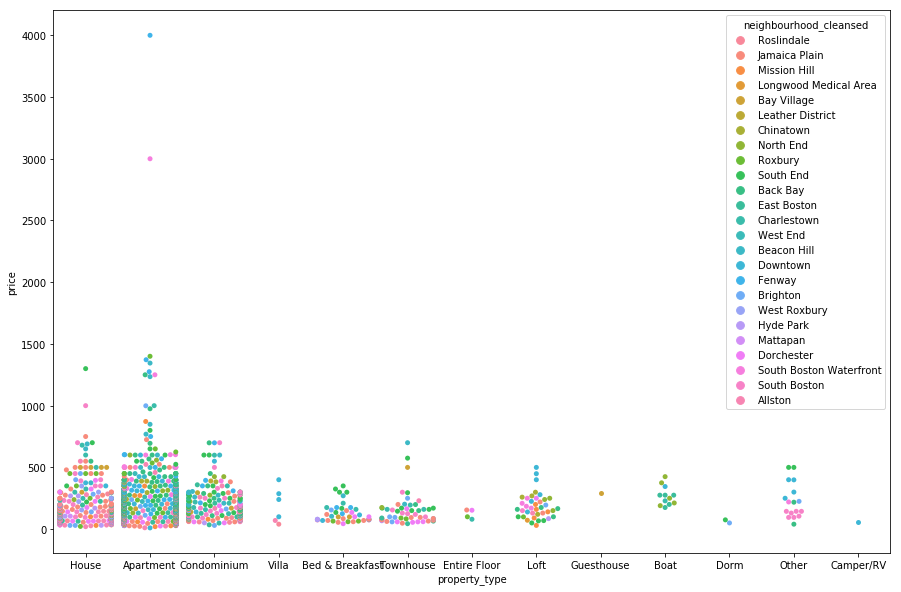

In [86]:
fig, ax = make_ax(15, 10)
sns.swarmplot(data=data, x="property_type", y='price', hue='neighbourhood_cleansed', ax=ax)

In [87]:
# Nothing can be with certainty taken from the data that will allow us to smartly fill it. 
# Since it s only 3 records I will fill it with 'Other'
data.property_type.fillna('Other', inplace=True)

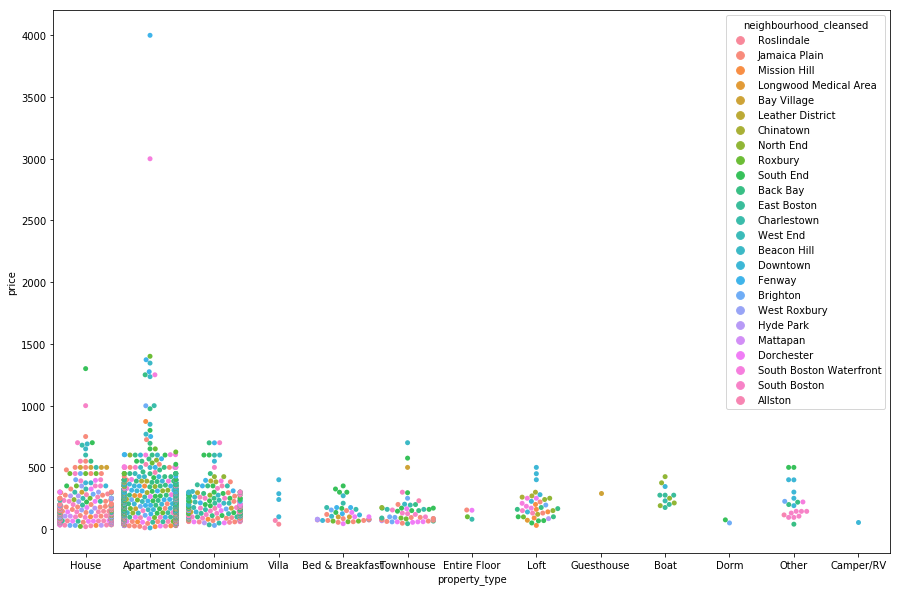

In [88]:
# We see that by putting those three in the "Other" category is reasonable taking in acount 
# the price and neighbourhood
fig, ax = make_ax(15, 10)
sns.swarmplot(data=data, x="property_type", y='price', hue='neighbourhood_cleansed', ax=ax)

### Beds

To fill the missing values in the beds variable, I grouped by property type and how many it can accommodate. Then proceeded to take the mean value and round it up.
For each missing value, it then searches this group and takes the value correspondent to the mean of its group

In [89]:
data.bedrooms.value_counts()

1.0    2379
2.0     693
0.0     287
3.0     155
4.0      45
5.0      16
Name: bedrooms, dtype: int64

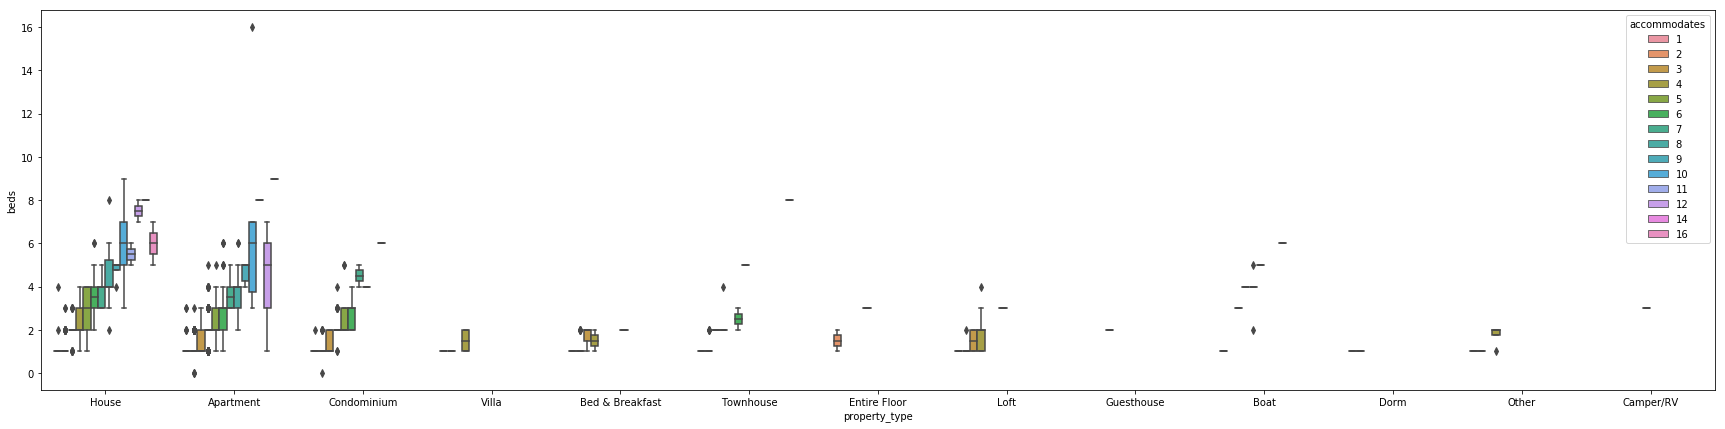

In [90]:
fig, ax = make_ax(30, 7)
sns.boxplot(data=data, x='property_type', y='beds', hue='accommodates', ax=ax)

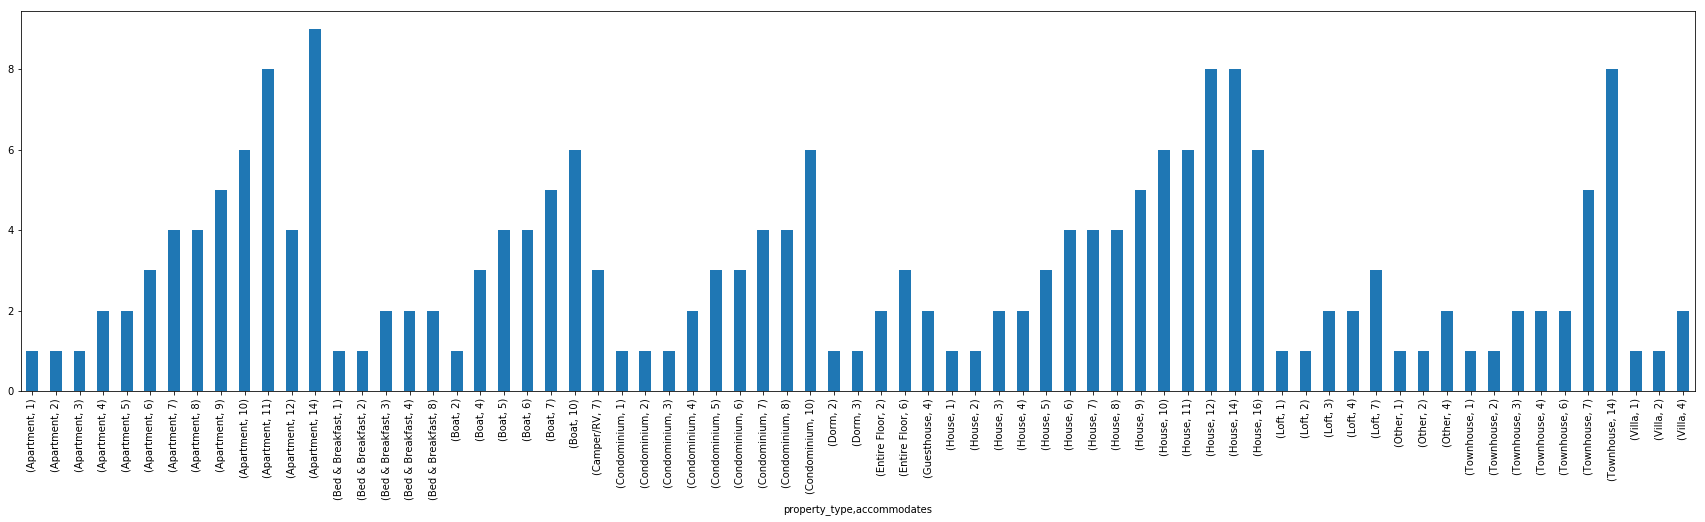

In [91]:
fig, ax = make_ax(30, 7)
data.groupby(['property_type', 'accommodates']).beds.mean().round().plot(kind='bar', ax=ax)

In [92]:
bed_imputation = data.groupby(['property_type', 'accommodates']).bedrooms.mean().round()
data.loc[data.beds.isna(), 'beds'] = data.loc[data.beds.isna(), :]\
    .apply(lambda x: bed_imputation[x.property_type, x.accommodates], axis=1)

### Bathrooms

To fill the missing values in the bathrooms variable, I grouped by property type, how many it can accommodate and room type. Then proceeded to take the mean value and round it up.
For each missing value, it then searches this group and takes the value correspondent to the mean of its group. Same idea as before.

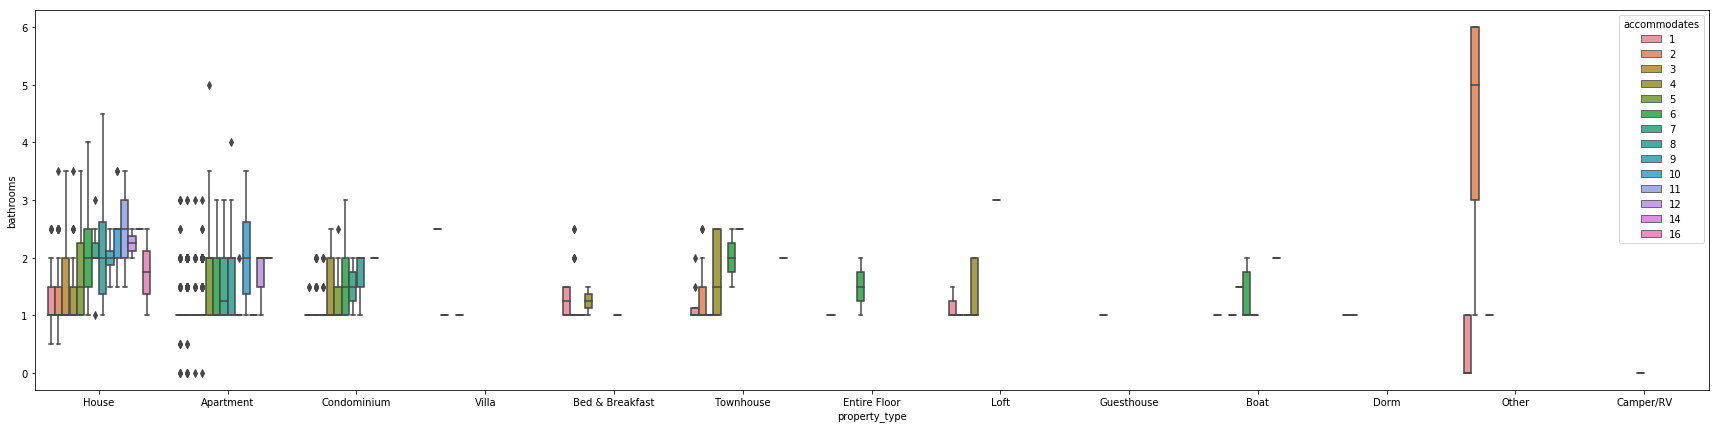

In [93]:
fig, ax = make_ax(30, 7)
sns.boxplot(data=data, x='property_type', y='bathrooms', hue='accommodates', ax=ax)

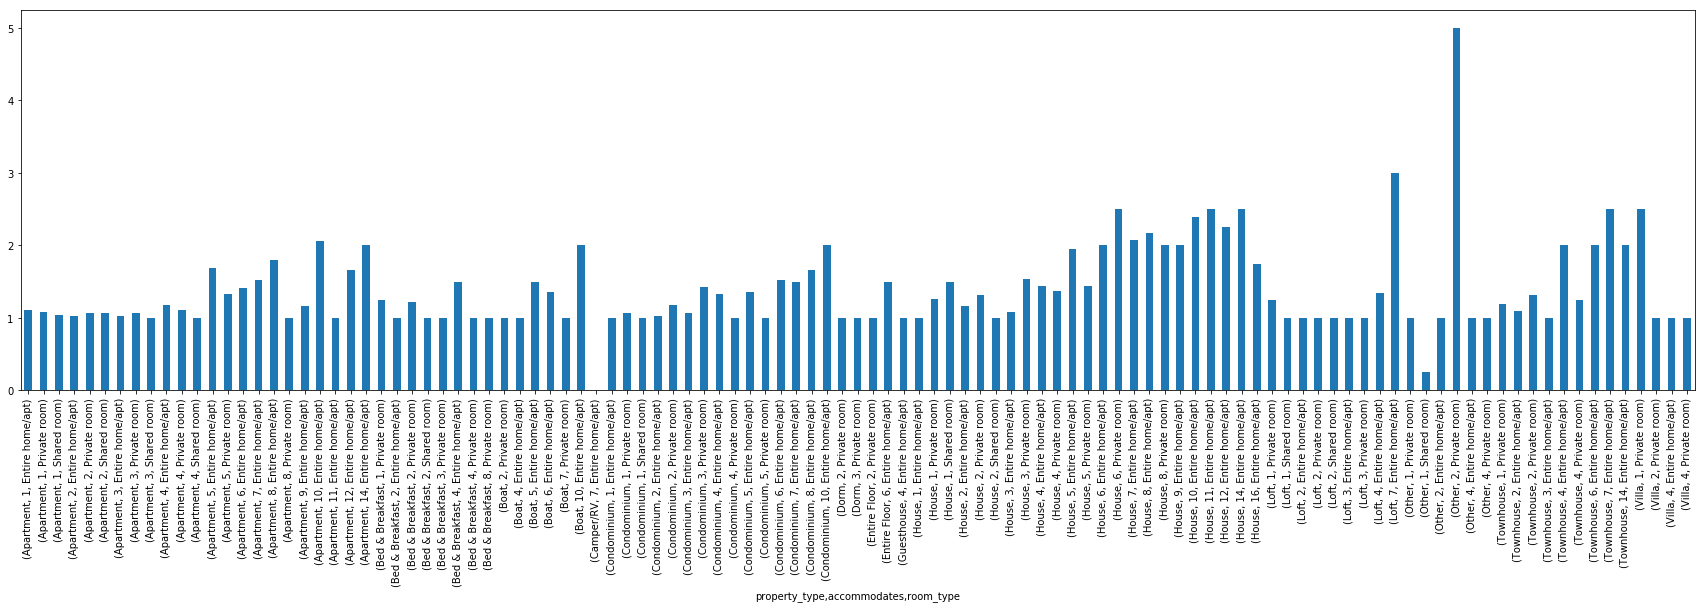

In [94]:
fig, ax = make_ax(30, 7)
data.groupby(['property_type', 'accommodates', 'room_type']).bathrooms.mean().plot(kind='bar', ax=ax)

In [95]:
data["bathrooms"].unique()

array([1.5, 1. , 2. , 0. , 2.5, 3.5, nan, 3. , 0.5, 4.5, 4. , 5. , 6. ])

In [96]:
bathroom_imputation = data.groupby(['property_type', 'accommodates', 'room_type']).bathrooms.mean()\
    .apply(lambda x: round_half(x))

In [97]:
data.loc[data.bathrooms.isna(), 'bathrooms'] = data.loc[data.bathrooms.isna(), :]\
    .apply(lambda x: bathroom_imputation[x.property_type, x.accommodates, x.room_type], axis=1)

### Bedrooms

To fill the missing values in the bedrooms variable, I grouped by property type, how many it can accommodate and beds. Then proceeded to take the mean value and round it up.
For each missing value, it then searches this group and takes the value correspondent to the mean of its group. Same idea as before.

In [98]:
data.bedrooms.value_counts()

1.0    2379
2.0     693
0.0     287
3.0     155
4.0      45
5.0      16
Name: bedrooms, dtype: int64

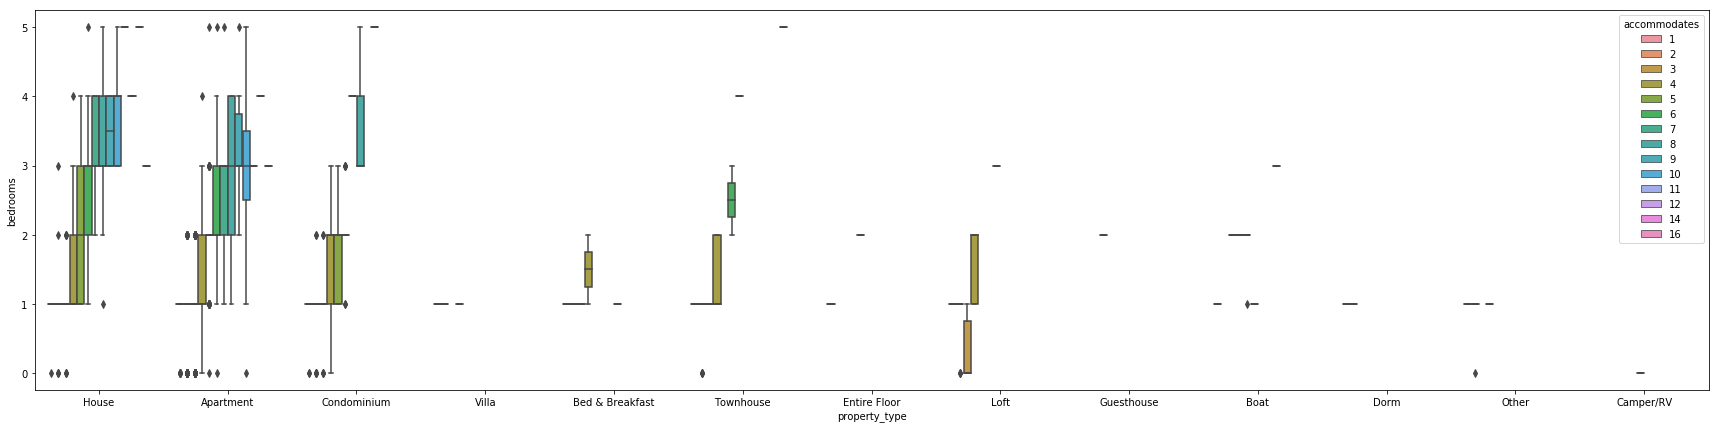

In [99]:
fig, ax = make_ax(30, 7)
sns.boxplot(data=data, x='property_type', y='bedrooms', hue='accommodates', ax=ax)

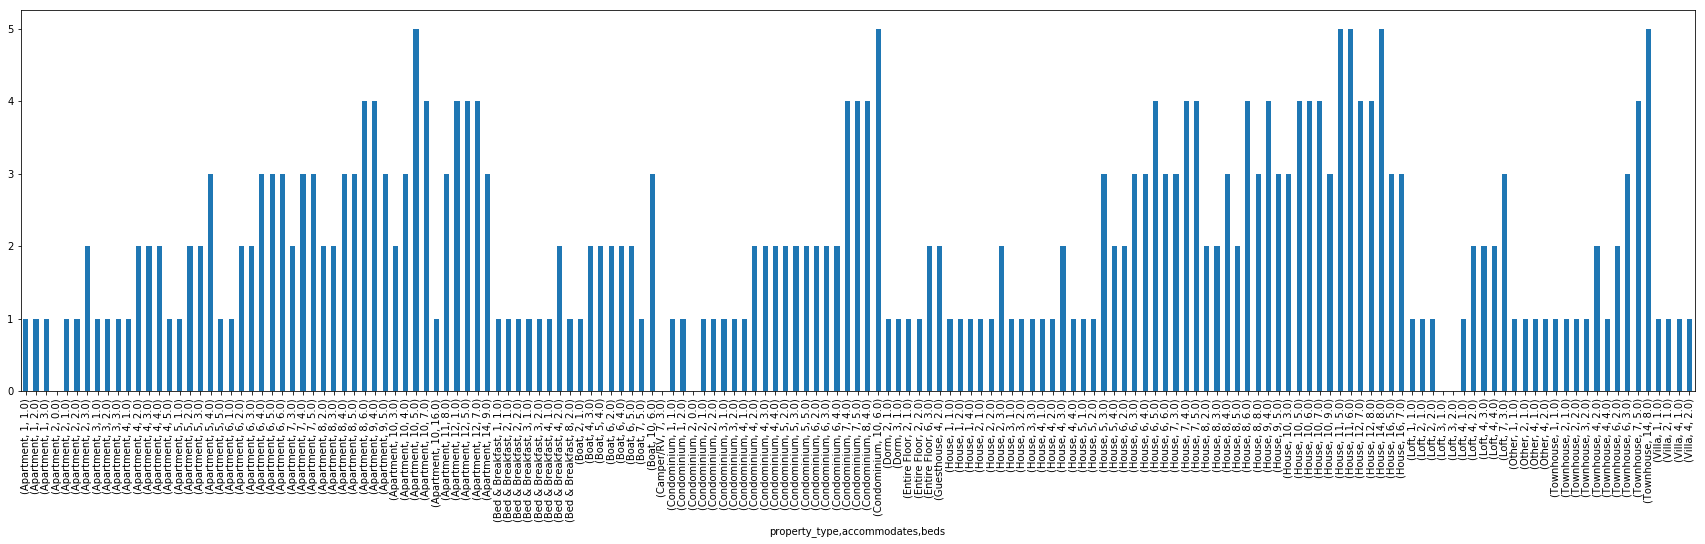

In [100]:
fig, ax = make_ax(30, 7)
data.groupby(['property_type', 'accommodates', 'beds']).bedrooms.mean().apply(round).plot(kind='bar', ax=ax)

In [101]:
bedroom_imputation = data.groupby(['property_type', 'accommodates', 'beds']).bedrooms.mean().apply(round)
data.loc[data.bedrooms.isna(), 'bedrooms'] = data.loc[data.bedrooms.isna(), :]\
    .apply(lambda x: bedroom_imputation[x.property_type, x.accommodates, x.beds], axis=1)

### Cleaning Fee

Either there is or there isnt a cleaning fee. Therefore is there is none then the value is zero

In [102]:
data["cleaning_fee"] = data["cleaning_fee"].fillna(0)

### Review scores

For all the review scores, since there are listings with no reviews yet, I will mar the ones with no review not with ZERO (because it can have really bad reviews of zero) but with a out-of-scale number like -9999

In [103]:
# Filling it with -9999 meaning there is no review yet

review_cols = data.filter(like='review_scores').columns.values
data[review_cols] = data[review_cols].fillna(-9999)

### Reviews per Month

In this case, it comes up NaN because there were no reviews, so I fill it also with zeros.

In [104]:
# Reviews per month should be zero if the number of reviews is zero, 
# which happens always when reviews_per_month is NaN
data[data.reviews_per_month.isna()][["number_of_reviews"]].head()

,number_of_reviews
0,0
18,0
32,0
36,0
53,0


In [105]:
data.reviews_per_month = data.reviews_per_month.fillna(0)

### Host Verifications

There is only one record without any verification. Probably a new host who hasnt been verified yet. Filling it with all zeros.

In [106]:
data[data.host_verifications_google.isna()]

,id,last_scraped,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_verifications_amex,host_verifications_email,host_verifications_facebook,host_verifications_google,host_verifications_jumio,host_verifications_kba,host_verifications_linkedin,host_verifications_manual_offline,host_verifications_manual_online,host_verifications_phone,host_verifications_reviews,host_verifications_sent_id,host_verifications_weibo,amenities_24-Hour Check-in,amenities_Air Conditioning,amenities_Breakfast,amenities_Buzzer/Wireless Intercom,amenities_Cable TV,amenities_Carbon Monoxide Detector,amenities_Cat(s),amenities_Dog(s),amenities_Doorman,amenities_Dryer,amenities_Elevator in Building,amenities_Essentials,amenities_Family/Kid Friendly,amenities_Fire Extinguisher,amenities_First Aid Kit,amenities_Free Parking on Premises,amenities_Free Parking on Street,amenities_Gym,amenities_Hair Dryer,amenities_Hangers,amenities_Heating,amenities_Hot Tub,amenities_Indoor Fireplace,amenities_Internet,amenities_Iron,amenities_Kitchen,amenities_Laptop Friendly Workspace,amenities_Lock on Bedroom Door,amenities_Other pet(s),amenities_Paid Parking Off Premises,amenities_Pets Allowed,amenities_Pets live on this property,amenities_Pool,amenities_Safety Card,amenities_Shampoo,amenities_Smoke Detector,amenities_Smoking Allowed,amenities_Suitable for Events,amenities_TV,amenities_Washer,amenities_Washer / Dryer,amenities_Wheelchair Accessible,amenities_Wireless Internet
682,7450348,2016-09-07,39019557,Brendon,2015-07-20,Never,0.0,0.0,0,1,0,0,"North Margin Street, Boston, MA 02113, United ...",North End,42.364448,-71.05756,Apartment,Entire home/apt,2,1.0,2.0,2.0,Real Bed,200.0,0.0,1,0.0,1,1125,0,0,0,0,0,NaT,NaT,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,0,flexible,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


In [107]:
# Taking care of the one listing with no verifications
host_verification_cols = data.filter(like = 'host_verifications').columns.values
data[host_verification_cols] = data[host_verification_cols].fillna(0)

### Check Missing Once More

In [108]:
# Only the reviews dates have missing values. Since it doesn't affect out questions and it is not needed 
# for modelling, we also will drop these columns

data.columns[data.isna().sum() > 0]

Index(['first_review', 'last_review'], dtype='object')

In [109]:
data = data.drop(["first_review", "last_review"], axis=1)

In [110]:
data.columns[data.isna().sum() > 0]

Index([], dtype='object')

## Feature Engineering

### Get Duration as a host

We can then add a new variable representing the amount of days that an airbnb host has been hosting.

In [111]:
data["host_for_days"] = (data.last_scraped - data.host_since)
data["host_for_days"] = data["host_for_days"].apply(lambda x: x.days)
data["host_for_days"].sample(2)

3556     769
1040    1272
Name: host_for_days, dtype: int64

## Check for Price Outliers

Since my analysis is going to be based on the price, we should check for outliers and strip the dataset of these "toxic" datapoints that will in turn mess with our statistical and modelling analysis.

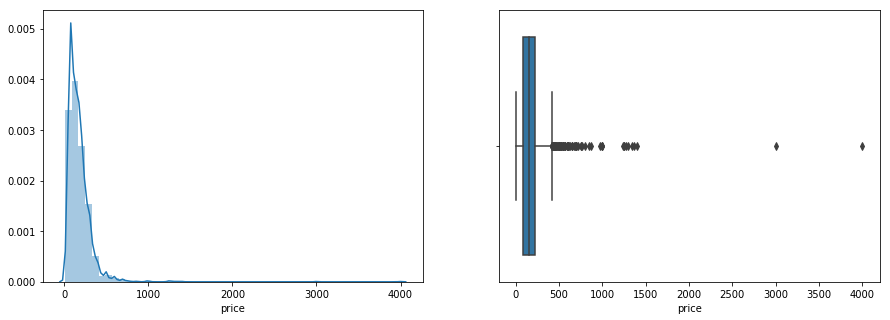

In [135]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.distplot(data.price, ax=ax[0])
sns.boxplot(data.price, ax=ax[1])

##### Percentage of outliers

In [140]:
print("The Percentage of outliers over 500$ is {}%".format(data[data.price > 500].id.count() / data.shape[0] * 100))

The Percentage of outliers over 500$ is 1.8410041841004186%


In [141]:
# In order to preserve the "sanity" of our data and since the outliers only sum up to 1.8% of the data, 
# then we can remove them.
data = data[(data.price < 500)]

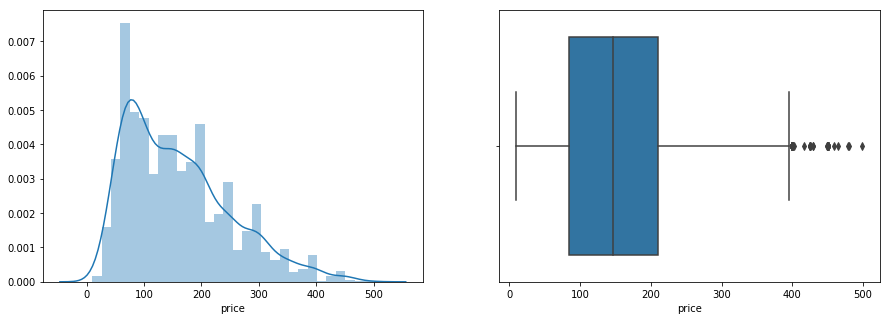

In [142]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.distplot(data.price, ax=ax[0])
sns.boxplot(data.price, ax=ax[1])

## Write to File

Write the processed data to a csv file so it can later be used by the analysis jupyter notebook

In [143]:
data.to_csv('airbnb_processed_data.csv', index=False)

# Calendar

The calendar data holds information about the availability and price of each listing throughout the year

In [54]:
calendar = pd.read_csv('calendar.csv', parse_dates=["date"])
calendar.sample(5)

,listing_id,date,available,price
1283279,6277566,2016-11-05,f,NaN
283202,7293671,2016-10-13,f,NaN
769614,14754902,2017-02-18,f,NaN
285271,2636365,2017-07-01,f,NaN
1181165,13638077,2017-08-11,t,$130.00


We can see that this dataset holds the same format issues as the previous listings one. 

To solve this:

- **AVAILABLE** - Type: STRING. Parse from 'f' and 't' to 0 and 1, respectively.
- **PRICE** - Type: STRING. Remove the dollar sign and the comma, like before

In [55]:
calendar["available"] = calendar["available"].replace({'f':0, 't':1}).astype(int)
calendar = parse_prices(calendar, ['price'])
calendar.sample(5)

,listing_id,date,available,price
377626,14461998,2017-01-13,0,NaN
141783,2933661,2017-03-23,1,85.0
1015423,737519,2016-09-12,0,NaN
666831,14467554,2017-03-02,1,275.0
747267,497810,2017-05-03,0,NaN


Write the processed data to a csv file so it can later be used by the analysis jupyter notebook

In [56]:
calendar.to_csv('calendar_processed.csv', index=False)